 Problème



L'analyse des sentiments fait référence à l'analyse d'une opinion ou de sentiments sur quelque chose en utilisant des données comme du texte ou des images, concernant presque n'importe quoi. L'analyse des sentiments aide les entreprises dans leur processus décisionnel. Par exemple, si le sentiment du public envers un produit n'est pas si bon, une entreprise peut essayer de modifier le produit ou d'arrêter complètement la production afin d'éviter toute perte.

Il existe de nombreuses sources de sentiment public, par exemple des entretiens publics, des sondages d'opinion, des sondages, etc.

Dans cet practice, nous verrons comment effectuer une analyse de sentiment des données textuelles.

Définition du problème
Compte tenu des tweets concernant six compagnies aériennes américaines, la tâche consiste à prédire si un tweet contient un sentiment positif, négatif ou neutre à propos de la compagnie aérienne. Il s'agit d'une tâche d'apprentissage supervisé typique où, étant donné une chaîne de texte, nous devons classer la chaîne de texte en catégories prédéfinies.

Solution

Pour résoudre ce problème, nous suivrons le pipeline typique d'apprentissage automatique. 

1 Nous allons d'abord importer les bibliothèques requises et le jeu de données. 

2 Nous ferons ensuite une analyse exploratoire des données pour voir si nous pouvons trouver des tendances dans l'ensemble de données. 

3 Ensuite, nous effectuerons un prétraitement de texte pour convertir les données textuelles en données numériques pouvant être utilisées par un algorithme d'apprentissage automatique. 

4 Enfin, nous utiliserons des algorithmes d'apprentissage automatique pour former et tester nos modèles d'analyse des sentiments.

5  performances, modele à ameliorer ou pas?

6 Bonus: test sur des cas concrets!

7 deploiment (AWS)

In [338]:
#PARTIE 1: GENERALITES SUR LES RESEAUX DE NEURONES ANN (donnees tabulaires, dataframes)
#PARTIE 2: LES TECHINIQUES DE   CONVOLUTION (image to matrix numeric): RESEAUX CNN
#PARTIE 3: LES 3 TECHINIQUES DE VECTORISATION (text to matrix numeric): RESEAUX RNN

#PARTIE NON ABORDEES: audio to numeric, videos to numeric

# Bag of word: presence des mots

In [339]:
import numpy as np    
import pandas as pd
import warnings;warnings.filterwarnings("ignore")
import sklearn
import keras
import gensim

In [116]:
docs=["la terre brule", "dans le cours le prof a dit que la terre etait plate", "on termine les cours aujourd'hui"]
docs

['la terre brule',
 'dans le cours le prof a dit que la terre etait plate',
 "on termine les cours aujourd'hui"]

Pour commencer à utiliser,  vous devrez d'abord créer un CountVectorizer pour compter le nombre de mots 

In [117]:
from sklearn.feature_extraction.text import CountVectorizer  #API
cv = CountVectorizer()  #OBJECTIF: TEXT TO MATRIX #ngram_range=(1, 2)

In [118]:
docs

['la terre brule',
 'dans le cours le prof a dit que la terre etait plate',
 "on termine les cours aujourd'hui"]

In [119]:
matrice=cv.fit_transform(docs).toarray()   #MATRIX  #Humainement mieux transformer cet objet numpy en dataframe de pandas pour plus de lisibilité
matrice

array([[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1],
       [1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0]], dtype=int64)

In [120]:
vocabulaire=cv.get_feature_names()
print(vocabulaire)

['aujourd', 'brule', 'cours', 'dans', 'dit', 'etait', 'hui', 'la', 'le', 'les', 'on', 'plate', 'prof', 'que', 'termine', 'terre']


In [121]:
data_cv=pd.DataFrame(matrice, columns=vocabulaire)  
data_cv.index=['phrase1','phrase2',"phrase3"]
data_cv

,aujourd,brule,cours,dans,dit,etait,hui,la,le,les,on,plate,prof,que,termine,terre
phrase1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
phrase2,0,0,1,1,1,1,0,1,2,0,0,1,1,1,0,1
phrase3,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0


In [122]:
#chatgpt: fait moi un code python qui calcule la somme des nombre allant de 1 à 100
#l'inconveniant de cette methode est qu'elle ne prend pas en compte/

#l'IMPORTANCE DES MOTS, 
#ni leur SIGNIFICATION OU CONTEXTE

# Tf-idf: poids des mots

La fréquence des documents inverses (IDF) est un poids indiquant la fréquence d'utilisation d'un mot. Plus son utilisation est fréquente dans les documents, plus son score est faible. Plus le score est bas, moins le mot devient important.

Le TF-IDF (de l'anglais term frequency-inverse document frequency) est une méthode de pondération souvent utilisée en recherche d'information et en particulier dans la fouille de textes. Cette mesure statistique permet d'évaluer l'importance d'un terme contenu dans un document, relativement à une collection ou un corpus. Le poids augmente proportionnellement au nombre d'occurrences du mot dans le document. Il varie également en fonction de la fréquence du mot dans le corpus

In [123]:
docs

['la terre brule',
 'dans le cours le prof a dit que la terre etait plate',
 "on termine les cours aujourd'hui"]

In [124]:
data_cv   #nb_words=10

,aujourd,brule,cours,dans,dit,etait,hui,la,le,les,on,plate,prof,que,termine,terre
phrase1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
phrase2,0,0,1,1,1,1,0,1,2,0,0,1,1,1,0,1
phrase3,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0


In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer #API

vectorizer = TfidfVectorizer()
matrice=vectorizer.fit_transform(docs).toarray()

In [126]:
matrice=vectorizer.fit_transform(docs).toarray()
matrice

array([[0.        , 0.68091856, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.51785612, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.51785612],
       [0.        , 0.        , 0.22200805, 0.2919139 , 0.2919139 ,
        0.2919139 , 0.        , 0.22200805, 0.58382781, 0.        ,
        0.        , 0.2919139 , 0.2919139 , 0.2919139 , 0.        ,
        0.22200805],
       [0.42339448, 0.        , 0.32200242, 0.        , 0.        ,
        0.        , 0.42339448, 0.        , 0.        , 0.42339448,
        0.42339448, 0.        , 0.        , 0.        , 0.42339448,
        0.        ]])

In [127]:
vocabulaire=vectorizer.get_feature_names_out()
vocabulaire

array(['aujourd', 'brule', 'cours', 'dans', 'dit', 'etait', 'hui', 'la',
       'le', 'les', 'on', 'plate', 'prof', 'que', 'termine', 'terre'],
      dtype=object)

In [128]:
data_tfidf=pd.DataFrame(matrice, columns=vocabulaire)
data_tfidf.index=['phrase1','phrase2',"phrase3"]
data_tfidf

,aujourd,brule,cours,dans,dit,etait,hui,la,le,les,on,plate,prof,que,termine,terre
phrase1,0.000000,0.680919,0.000000,0.000000,0.000000,0.000000,0.000000,0.517856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.517856
phrase2,0.000000,0.000000,0.222008,0.291914,0.291914,0.291914,0.000000,0.222008,0.583828,0.000000,0.000000,0.291914,0.291914,0.291914,0.000000,0.222008
phrase3,0.423394,0.000000,0.322002,0.000000,0.000000,0.000000,0.423394,0.000000,0.000000,0.423394,0.423394,0.000000,0.000000,0.000000,0.423394,0.000000


In [129]:
data_cv

,aujourd,brule,cours,dans,dit,etait,hui,la,le,les,on,plate,prof,que,termine,terre
phrase1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
phrase2,0,0,1,1,1,1,0,1,2,0,0,1,1,1,0,1
phrase3,1,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0


In [130]:
#AVANTAGES:le tfidf prend bien en compte le poids des mots coontrairement au bag of word
#INCONVENIANTS: cette methode ne prend pas en compte le sens des mots ou encore le contexte

# Word2Vec: Contexte ou Sens

In [131]:
docs

['la terre brule',
 'dans le cours le prof a dit que la terre etait plate',
 "on termine les cours aujourd'hui"]

In [133]:
docs

['la terre brule',
 'dans le cours le prof a dit que la terre etait plate',
 "on termine les cours aujourd'hui"]

In [141]:
#Word2Vec Features
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim
text = doc["text"].apply(lambda x: x.split()) # tokenizing 
text

0                                   [la, terre, brule]
1    [dans, le, cours, le, prof, a, dit, que, la, t...
2               [on, termine, les, cours, aujourd'hui]
Name: text, dtype: object

In [142]:
#https://radimrehurek.com/gensim/models/word2vec.html
#https://datascientest.com/nlp-word-embedding-word2vec
#https://www.youtube.com/watch?v=nI6LWbfhTZk&t=9s

In [193]:
#modele
size=20
nb_contexte=5
model = gensim.models.Word2Vec( #le modele d'ia
            text,        #les donnees d entree format TEXT
            vector_size=size, #le contexte d un mot est defini par les 5mots qui le precedent et les 5mots qui le suivent
            window=nb_contexte, # je represente chaque mot par un vecteur de taille 10
            min_count=1, #  Ignore les mots qui apparaissent moins d'une fois
            sg=1  ) #0 si vous voulez definir un mot par son contexte, 1 par son sens
    
#on entraine le mot, il va representer chaque mot par un vecteur
model.train(text, total_examples=model.corpus_count,epochs=50)   

#on convertit les mots ou phrases par des matrices
data=pd.DataFrame(model.wv[list(model.wv.key_to_index)])  #on cree la base de donnees avec un dataframe
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.002974,0.001241,0.025281,0.044931,-0.046257,-0.035498,0.032377,0.045030,-0.025279,-0.018582,0.036861,-0.007819,-0.022564,0.032503,-0.024215,-0.009137,0.014840,0.004943,-0.041707,-0.047395
1,0.036032,0.025424,0.033474,0.003740,0.032308,-0.016731,-0.004297,0.029136,-0.038210,-0.019306,-0.037397,-0.005288,0.047776,-0.037107,-0.011836,-0.009736,0.041322,-0.029585,-0.000453,-0.024001
2,-0.048259,0.025161,-0.043901,-0.022071,0.000097,-0.001335,-0.038148,0.048330,0.024577,0.046398,-0.040802,0.022243,-0.020539,0.003932,0.042494,-0.022422,0.023039,-0.033885,-0.018083,0.046821
3,-0.008160,0.001711,-0.020758,-0.038416,-0.007342,0.012379,-0.004297,0.027718,-0.013925,0.011365,0.027277,0.041558,-0.007266,-0.046245,0.021761,0.002778,0.037413,-0.004119,-0.013474,-0.043903
4,-0.004395,0.014113,0.026994,0.035212,-0.028460,0.009322,0.030502,-0.023929,-0.015601,0.034081,0.008225,0.000901,0.017297,0.001033,0.048065,0.025302,-0.044531,-0.035198,0.004474,0.031984


In [192]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.002928,0.001270,0.025354,0.044892,-0.046371,-0.035484,0.032361,0.045062,-0.025213,-0.018618,0.036893,-0.007761,-0.022628,0.032568,-0.024244,-0.009122,0.014798,0.004910,-0.041689,-0.047301
1,0.036133,0.025422,0.033470,0.003662,0.032043,-0.016676,-0.004413,0.029222,-0.038052,-0.019242,-0.037348,-0.005071,0.047676,-0.036930,-0.011635,-0.009626,0.041234,-0.029576,-0.000372,-0.023754
2,-0.048237,0.025109,-0.043936,-0.022049,0.000021,-0.001355,-0.038273,0.048191,0.024799,0.046363,-0.040786,0.022307,-0.020646,0.004004,0.042569,-0.022399,0.022838,-0.033910,-0.017910,0.046959
3,-0.008071,0.001664,-0.020794,-0.038520,-0.007423,0.012461,-0.004341,0.027755,-0.013848,0.011455,0.027327,0.041576,-0.007215,-0.046178,0.021895,0.002877,0.037514,-0.004051,-0.013420,-0.043738
4,-0.004364,0.014104,0.026962,0.035238,-0.028450,0.009311,0.030495,-0.023939,-0.015608,0.034048,0.008233,0.000879,0.017286,0.001026,0.048055,0.025296,-0.044533,-0.035188,0.004467,0.031967


In [185]:
words=list(model.wv.key_to_index)
print(words)

['cours', 'le', 'terre', 'la', "aujourd'hui", 'les', 'termine', 'on', 'plate', 'etait', 'que', 'dit', 'a', 'prof', 'dans', 'brule']


In [186]:
data.shape

(16, 20)

In [187]:
data=pd.DataFrame(model.wv[list(model.wv.key_to_index)])
data.columns=["var_"+str(i+1) for i in range(size)]
data.index=words
data

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20
cours,-0.002928,0.001270,0.025354,0.044892,-0.046371,-0.035484,0.032361,0.045062,-0.025213,-0.018618,0.036893,-0.007761,-0.022628,0.032568,-0.024244,-0.009122,0.014798,0.004910,-0.041689,-0.047301
le,0.036133,0.025422,0.033470,0.003662,0.032043,-0.016676,-0.004413,0.029222,-0.038052,-0.019242,-0.037348,-0.005071,0.047676,-0.036930,-0.011635,-0.009626,0.041234,-0.029576,-0.000372,-0.023754
terre,-0.048237,0.025109,-0.043936,-0.022049,0.000021,-0.001355,-0.038273,0.048191,0.024799,0.046363,-0.040786,0.022307,-0.020646,0.004004,0.042569,-0.022399,0.022838,-0.033910,-0.017910,0.046959
la,-0.008071,0.001664,-0.020794,-0.038520,-0.007423,0.012461,-0.004341,0.027755,-0.013848,0.011455,0.027327,0.041576,-0.007215,-0.046178,0.021895,0.002877,0.037514,-0.004051,-0.013420,-0.043738
aujourd'hui,-0.004364,0.014104,0.026962,0.035238,-0.028450,0.009311,0.030495,-0.023939,-0.015608,0.034048,0.008233,0.000879,0.017286,0.001026,0.048055,0.025296,-0.044533,-0.035188,0.004467,0.031967
les,-0.043213,0.018331,0.025890,0.028678,0.037410,-0.030816,0.005619,0.030278,-0.014284,-0.030790,-0.001996,-0.041948,-0.028043,0.035483,0.016762,0.036136,0.034061,0.037676,-0.019017,-0.002808
termine,0.011714,-0.022615,0.041915,-0.049312,0.033887,0.014587,-0.024615,0.022039,-0.008740,0.033569,0.049869,-0.021913,-0.003025,-0.028473,0.019237,0.013977,0.034554,0.030569,0.047667,0.046382
on,0.039433,-0.034961,-0.045874,-0.001841,-0.015421,0.039555,0.029713,-0.007626,0.007518,0.009077,0.039127,-0.047659,-0.001036,0.017368,-0.004620,0.041926,0.045192,0.032767,-0.003583,0.038606
plate,-0.042765,0.016058,-0.023275,-0.025481,0.018078,0.027008,0.038936,-0.028722,0.036997,0.033310,-0.018492,-0.043867,0.027225,0.032407,-0.003910,-0.033569,-0.035200,-0.012477,0.025583,-0.018337
etait,-0.047088,0.019166,0.024311,-0.032252,0.006208,-0.010335,0.000290,-0.049213,0.013237,-0.023550,0.005537,-0.008094,0.010937,-0.039550,-0.013582,0.013319,0.027032,-0.011944,-0.047771,0.022548


In [ ]:
#roi+femme-homme=reine

In [166]:
docs

['la terre brule',
 'dans le cours le prof a dit que la terre etait plate',
 "on termine les cours aujourd'hui"]

In [23]:
#vec(“king”) - vec(“man”) + vec(“woman”) =~ vec(“queen”)

In [170]:
model.wv.most_similar(positive="brule")  #the most similar words from the corpus

[('le', 0.12229078263044357),
 ('on', 0.08030968904495239),
 ('cours', 0.05396855250000954),
 ("aujourd'hui", 0.015958650037646294),
 ('dit', 0.012974392622709274),
 ('etait', 0.010642505250871181),
 ('a', -0.0039824312552809715),
 ('plate', -0.014720246195793152),
 ('terre', -0.019884280860424042),
 ('les', -0.026302335783839226)]

In [173]:
model.wv['cours']  #Let’s check the vector representation of any word from our corpus.


array([-5.6807662e-04,  2.7857267e-04,  5.1259305e-03,  9.0209730e-03,
       -9.2730857e-03, -7.1462523e-03,  6.4683892e-03,  9.0460107e-03,
       -5.0554159e-03, -3.8283074e-03,  7.4073044e-03, -1.5789836e-03,
       -4.5296950e-03,  6.5273694e-03, -4.8135496e-03, -1.8150633e-03,
        2.9466460e-03,  9.9958479e-04, -8.3341729e-03, -9.5329927e-03,
        7.3001222e-03,  5.0689098e-03,  6.8281638e-03,  7.2559452e-04,
        6.3524204e-03, -3.3854353e-03, -9.7372098e-04,  5.8262474e-03,
       -7.5442996e-03, -3.8915412e-03, -7.4857729e-03, -9.6574915e-04,
        9.5444489e-03, -7.3388731e-03, -2.3617023e-03, -1.9231680e-03,
        8.1018731e-03, -5.9149954e-03,  3.0339281e-05, -4.7284951e-03,
       -9.5879566e-03,  5.0218380e-03, -8.7919114e-03, -4.3635969e-03,
       -2.5713658e-05, -3.0306343e-04, -7.6485579e-03,  9.6072452e-03,
        4.9693282e-03,  9.2661651e-03, -8.1334542e-03,  4.4643744e-03,
       -4.1654804e-03,  7.8338786e-04,  8.4560774e-03, -4.4858526e-03,
      

In [174]:
model.wv['le'] +model.wv['cours'] +model.wv['termine'] 

array([-1.0865238e-03, -4.5361323e-04,  9.3348660e-03,  1.5776061e-02,
       -1.9853187e-03, -1.2222855e-02,  1.3713698e-02,  1.5228756e-02,
       -1.1245606e-02, -1.1682466e-02,  1.2923742e-02, -8.5149854e-03,
       -1.0873314e-02,  2.2885829e-02, -6.3126436e-03,  4.5404453e-03,
        1.9055273e-02,  1.5290729e-02, -1.0710843e-02, -1.9209050e-02,
        1.0746126e-02, -1.7471716e-03,  2.4762034e-02, -7.9811504e-03,
        1.4548413e-02,  2.0012765e-03, -7.8390306e-03,  5.3599640e-03,
       -9.1166683e-03,  9.5709437e-04,  9.1013433e-03,  3.5564685e-03,
        8.2942443e-03, -1.0137565e-02, -4.6667997e-03,  2.5764266e-03,
        8.0703711e-03, -8.4982254e-03,  3.6014356e-03, -4.3823095e-03,
        5.6448001e-03, -7.7393330e-03, -9.7634066e-03, -1.1878734e-02,
        3.1661871e-04,  1.7178370e-02, -9.4708214e-03, -1.9120984e-03,
        2.1444918e-03,  8.4470604e-03, -5.5705738e-04, -1.3977459e-02,
       -1.2983550e-02,  6.9703180e-03, -8.0842339e-04, -5.1990575e-03,
      

In [188]:
model.wv.similarity("la", "terre")  

0.23271534

In [189]:
model.wv.similar_by_vector("la")  


[('brule', 0.3672201335430145),
 ('que', 0.26623788475990295),
 ('prof', 0.25444409251213074),
 ('terre', 0.23271535336971283),
 ('dans', 0.21336685121059418),
 ('termine', 0.1840076893568039),
 ('le', 0.1587478369474411),
 ('dit', 0.1420685350894928),
 ('etait', 0.09299004077911377),
 ('cours', 0.05914854258298874)]

In [29]:
model.wv.similarity("brule", "terre")  # similarité

0.43182024

# Application

In [199]:
import pandas as pd
data_brute=pd.read_csv("C:/Users/sambe/Desktop/ESGI/SEANCE3/Tweets.csv")
data_brute.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [201]:
data=data_brute[["text","negativereason","airline_sentiment","airline"]]
data.head()

,text,negativereason,airline_sentiment,airline
0,@VirginAmerica What @dhepburn said.,NaN,neutral,Virgin America
1,@VirginAmerica plus you've added commercials t...,NaN,positive,Virgin America
2,@VirginAmerica I didn't today... Must mean I n...,NaN,neutral,Virgin America
3,@VirginAmerica it's really aggressive to blast...,Bad Flight,negative,Virgin America
4,@VirginAmerica and it's a really big bad thing...,Can't Tell,negative,Virgin America


In [202]:
data.shape  #plus de 14600 tweets! et on dispose pour chaque tweet 3 informations (texte, negativereason","airline_sentiment","airline")

(14640, 4)

<AxesSubplot:>

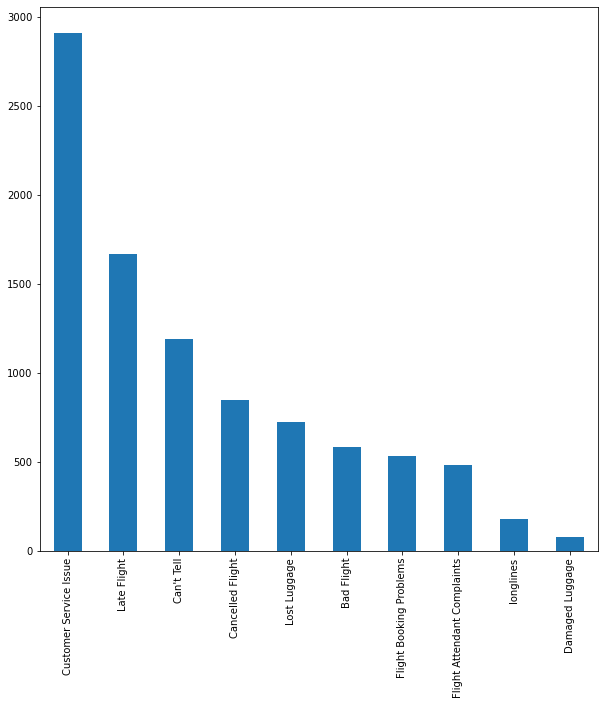

In [206]:
data.negativereason.value_counts().plot(kind="bar", figsize=(10,10))

<AxesSubplot:>

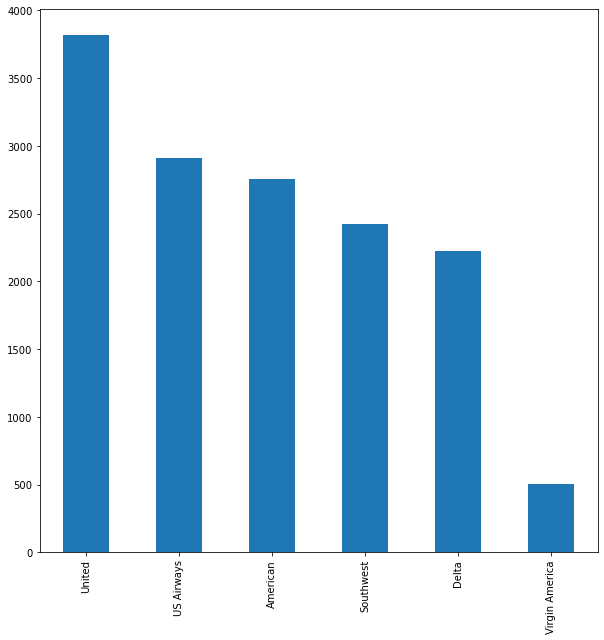

In [207]:
data.airline.value_counts().plot(kind="bar", figsize=(10,10))

<AxesSubplot:>

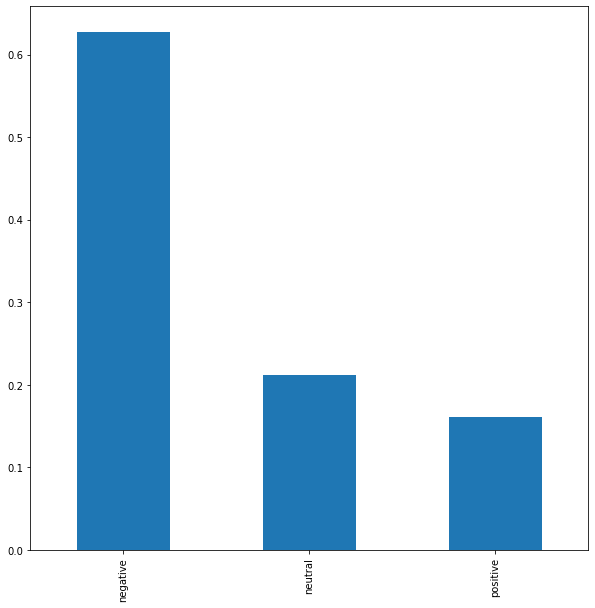

In [209]:
data.airline_sentiment.value_counts(normalize=True).plot(kind="bar", figsize=(10,10))

In [ ]:
#plus de 60% des tweets sont negatifs, 17% sont positifs

In [319]:
#objectif: faire un modele ia qui permettra de savoir si un TEXT(text) est negataif, positif ou neutre (air_sentiment)
X=data["text"] #variables explicatives
y=data["airline_sentiment"]  #variable à expliquer

In [320]:
X

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [321]:
y

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [322]:
#QUESTION DE COURS: donnez moi la represtation vectorielle des tweets avec du tfidf

In [327]:
from sklearn.feature_extraction.text import TfidfVectorizer #API
vectorizer = TfidfVectorizer(stop_words='english',max_features=1000)  #on prends les 1000 mots les plus interessants

X=data["text"] #variables explicatives

matrice=vectorizer.fit_transform(X.to_list()).toarray()
vocabulaire=vectorizer.get_feature_names_out()
X=pd.DataFrame(matrice, columns=vocabulaire)
X.index=['phrase'+str(i+1) for i in range(len(X))]
X

,000,10,100,11,12,14,15,16,17,18,...,wrong,wtf,yall,yeah,year,years,yes,yesterday,yr,zero
phrase1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
phrase2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
phrase3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
phrase4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
phrase5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
phrase14636,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
phrase14637,0.0,0.0,0.0,0.0,0.0,0.0,0.275431,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
phrase14638,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
phrase14639,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Artificial Neural Network 


In [328]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from tensorflow.keras.layers import Dropout


## SPLIT mes donnees en entrainement et test

In [329]:
#tranformons Y en 1 si le message est negatif sinon 0 (neutre ou positf)
y = y.apply(lambda x: 1 if x =="negative" else 0)  

<AxesSubplot:ylabel='airline_sentiment'>

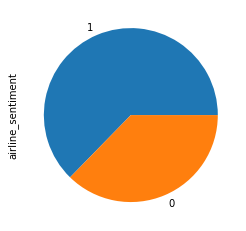

In [330]:
y.value_counts().plot(kind="pie")

In [331]:
import sklearn
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
#On prend 90% des données pour entrainer le modele et 10% sont reservés pour le test

In [332]:
y_train.value_counts(normalize=True)

1    0.625379
0    0.374621
Name: airline_sentiment, dtype: float64

In [333]:
y_test.value_counts(normalize=True)

1    0.64071
0    0.35929
Name: airline_sentiment, dtype: float64

In [335]:
import numpy as np   #des calculs
from tensorflow import keras    #j importe tensorflow
from tensorflow.keras import layers   #reseaux de neurones


classifier = Sequential()

classifier.add(Dense(activation='tanh', input_dim=1000,units=100+1)) #JE LIS LES DONNEES D ENTREE

classifier.add(Dense(10, activation='tanh'))

classifier.add(Dense(1, activation='sigmoid'))
#Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [336]:
#Compiling the ANN: on utilse une fonction de ADAM qui MINIMISE les erreurs
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#loss calcule les erreurs
#Adam optimise les erreurs
#metrics=Accuracy, je luis dis que le score est la performance


In [337]:
#batch_size=20 ici on charge les informations par 20 (c'est à dire on prends par 20personnes)
#epoch=100, il peut essayer 100 fois
#verbose=1, on affiche les resultats au fur et à mesure!
#validation_split=0.1, je reserve 10% de mes données pour la validation
#Fitting the ANN
model.fit(X_train,y_train, validation_split=0.10,batch_size=20, epochs=10, verbose=1)
#checking the performance of the model
score = model.evaluate(X_train,y_train, verbose=0)
print('train Model Accuracy = ',score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('test Model Accuracy = ',score[1])

Epoch 1/10
593/593 [==============================] - 6s 8ms/step - loss: 0.4626 - accuracy: 0.6284 - val_loss: 0.3910 - val_accuracy: 0.5979
Epoch 2/10
593/593 [==============================] - 3s 6ms/step - loss: 0.3641 - accuracy: 0.6284 - val_loss: 0.3870 - val_accuracy: 0.5979
Epoch 3/10
593/593 [==============================] - 3s 6ms/step - loss: 0.3439 - accuracy: 0.6284 - val_loss: 0.3932 - val_accuracy: 0.5979
Epoch 4/10
593/593 [==============================] - 4s 6ms/step - loss: 0.3268 - accuracy: 0.6284 - val_loss: 0.3962 - val_accuracy: 0.5979
Epoch 5/10
593/593 [==============================] - 4s 6ms/step - loss: 0.3070 - accuracy: 0.6284 - val_loss: 0.4032 - val_accuracy: 0.5979
Epoch 6/10
593/593 [==============================] - 3s 5ms/step - loss: 0.2856 - accuracy: 0.6284 - val_loss: 0.4119 - val_accuracy: 0.5979
Epoch 7/10
593/593 [==============================] - 4s 7ms/step - loss: 0.2624 - accuracy: 0.6284 - val_loss: 0.4250 - val_accuracy: 0.5979
Epoch 

In [30]:
#https://towardsdatascience.com/visualization-of-word-embedding-vectors-using-gensim-and-pca-8f592a5d3354